<a href="https://colab.research.google.com/github/surendraghub/AI-ML-Project-/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
import cufflinks as cf
import plotly as py
from plotly.offline import iplot
from collections import Counter

In [ ]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data = pd.read_csv('/content/Data Analyst - Test Data - US.csv')
data.head()

Review        date     Location
0  I was very impressed with the resort.\n Great ...  2019/08/20    Sebastian
1  The rooms were nice the outside needs work als...  2019/08/20  Los Angeles
2  Great location! I have stayed at this hotel on...  2019/08/20      Georgia
3  The hotel was adequate for my stay. The strips...  2019/08/20          NaN
4  Great location, room was large and spacious. P...  2019/08/19  Palm Harbor

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [ ]:
data.isnull()

Review   date  Location
0      False  False     False
1      False  False     False
2      False  False     False
3      False  False      True
4      False  False     False
...      ...    ...       ...
6443   False  False     False
6444   False  False     False
6445   False  False     False
6446   False  False     False
6447   False  False     False

[6448 rows x 3 columns]

In [ ]:
data.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

In [ ]:
data = data.drop(['date','Location'], axis=1)
data.head()

Review
0  I was very impressed with the resort.\n Great ...
1  The rooms were nice the outside needs work als...
2  Great location! I have stayed at this hotel on...
3  The hotel was adequate for my stay. The strips...
4  Great location, room was large and spacious. P...

In [ ]:
data.isnull()

Review
0      False
1      False
2      False
3      False
4      False
...      ...
6443   False
6444   False
6445   False
6446   False
6447   False

[6448 rows x 1 columns]

In [ ]:
data.isnull().sum()

Review    55
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()


Review    0
dtype: int64

In [ ]:
data['Review']

0       I was very impressed with the resort.\n Great ...
1       The rooms were nice the outside needs work als...
2       Great location! I have stayed at this hotel on...
3       The hotel was adequate for my stay. The strips...
4       Great location, room was large and spacious. P...
                              ...                        
6443    ·the staff were all so friendly. frank, the ch...
6444           ·the internet barely worked or didn't work
6445    ·the location was great.\n \n \n \n \n ·the be...
6446    ·we were early for check in and the staff was ...
6447    ·staff, free coffee, location and activities.\...
Name: Review, Length: 6393, dtype: object

In [ ]:
data['Review'].tolist()

['I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n  \n  Read more\n  Read less',
 'The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok\n  \n  Read more\n  Read less',
 'Great location! I have stayed at this hotel on my last three trips to New York.\n  \n  Read more\n  Read less',
 'The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.\n  \n  Read more\n  Read less',
 'Great location, room was large and spacious. Parking was easy and we appreciated 

In [ ]:
' '.join(data['Review'].tolist())

'I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n  \n  Read more\n  Read less The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok\n  \n  Read more\n  Read less Great location! I have stayed at this hotel on my last three trips to New York.\n  \n  Read more\n  Read less The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.\n  \n  Read more\n  Read less Great location, room was large and spacious. Parking was easy and we appreciated the friendly staf

In [ ]:
contractions = {
"aren’t" : "are not",
"there’s" : "there is",
"can’t" : "can not",
"they’d" : "they had",
"couldn’t" : "could not",
"they’ll" : "they will",
"didn’t" : "did not",
"they’re" : "they are",
"doesn’t" : "does not",
"they’ve" : "they have",
"don’t" : "do not",
"we’d" : "we had",
"hadn’t" : "had not",
"we’re" : "we are",
"hasn’t" : "has not",
"we’ve" : "we have",
"haven’t" : "have not",
"he’d" : "he had",
"he’ll" : "he will",
"he’s" : "he is",
"I’d" : "I had",
"I’ll" : "I will",
"I’m" : "I am",
"I’ve" : "I have",
"isn’t" : "is not",
"let’s" : "let us",
"mightn’t" : "might not",
"mustn’t" : "must not",
"shan’t" : "shall not",
"she’d" : "she had",
"she’ll" : "she will",
"she’s" : "she is",
"shouldn’t" : "should not",
"that’s" : "that is",
"what’ll" : "what will",
"what’re" : "what are",
"what’s" : "what is",
"what’ve" : "what have",
"where’s" : "where is",
"who’d" : "who had",
"who’ll" : "who will",
"who’re" : "who are",
"who’s" : "who is",
"who’ve" : "who have",
"won’t" : "will not",
"wouldn’t" : "would not",
"you’d" : "you had",
"you’ll" : "you will",
"you’re" : "you are",
"you’ve" : "you have",
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"could've": "could have",
"couldn't": "could not",
"daren't": "dare not",
"daresn't": "dare not",
"dasn't": "dare not",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"e'er": "ever",
"everyone's": "everyone is",
"finna": "fixing to",
"gimme": "give me",
"gonna": "going to",
"gotta": "got to",
"hadn't": "had not",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'll": "he will",
"he's": "he is / he has",
"how'd": "how did / how would",
"how'll": "how will",
"how're": "how are",
"how's": "how is / how has",
"I'd": "I had / I would",
"I'll": "I will",
"I'm": "I am",
"I'm'a": "I am about to",
"I'm'o": "I am going to",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is / it has",
"kinda": "kind of",
"let's": "let us",
"ma'am": "madam",
"may've": "may have",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"ne'er": "never",
"needn't": "need not",
"o'clock": "of the clock",
"o'er": "over",
"ol'": "old",
"oughtn't": "ought not",
"shan't": "shall not",
"she'd": "she had / she would",
"she'll": "she will",
"she's": "she is / she has",
"should've": "should have",
"shouldn't": "should not",
"somebody's": "somebody is",
"someone's": "someone is",
"something's": "something is",
"so're": "so are",
"that'll": "that will",
"that're": "that are",
"that's": "that is / that has",
"that'd": "that would / that had",
"there'd": "there had / there would",
"there'll": "there will",
"there're": "there are",
"there's": "there is / there has",
"these're": "these are",
"they'd": "they had / they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"this's": "this is / this has",
"those're": "those are",
"'tis": "it is",
"'twas": "it was",
"wanna": "want to",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'cha": "what are you",
"what'd": "what did",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"u" : "you",
"ur" : "your",
"n" :  "and"
}

In [ ]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
%%time
data['Review'] = data['Review'].apply(lambda x:cont_to_exp(x))

CPU times: user 318 ms, sys: 0 ns, total: 318 ms
Wall time: 319 ms


In [ ]:
data.head()


Review
0  I was very impressed with the resort.\n Great ...
1  The rooms were andice the oyoutside andeeds wo...
2  Great locatioand! I have stayed at this hotel ...
3  The hotel was adeqyouate for my stay. The stri...
4  Great locatioand, room was large aandd spacioy...

In [ ]:
' '.join(data['Review'].tolist())

'I was very impressed with the resort.\n Great staff at the maiand resort pool bar! We had a blast with them.\n Cleaand, professioandal staff, great locatioand aandd very reasoandable!\n  \n  Read more\n  Read less The rooms were andice the oyoutside andeeds work also ando free breakfast it woyould have beeand andice overall it was ok\n  \n  Read more\n  Read less Great locatioand! I have stayed at this hotel oand my last three trips to New York.\n  \n  Read more\n  Read less The hotel was adeqyouate for my stay. The strips iand the bathtyoub were youseless as I fell while takiandg a shower. I asked the froandt desk staff several times to get a bath mat byout they andever did. Maandagemeandt was youandrespoandsive to my reqyouest which was very poor; someoande shoyould have goande to a dollar store aandd gotteand a bath mat. Breakfast was good byout it woyould have beeand andice to have had yogyoyourt aandd/or cottage cheese oand the byouffet.\n  \n  Read more\n  Read less Great locati

In [ ]:
import re

def clean_text(text):
  if isinstance(text, str):
    text = re.sub(r"\\n", " ", text)
    text = re.sub(r"Read less", " ", text)
    text = re.sub(r"Read more", " ", text)
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text
  else:
    return text

data['Review'] = data['Review'].apply(lambda x: clean_text(x))

In [ ]:
' '.join([str(x) for x in data['Review'].tolist()])


'I was very impressed with the resort Great staff at the maiand resort pool bar We had a blast with them Cleaand professioandal staff great locatioand aandd very reasoandable  The rooms were andice the oyoutside andeeds work also ando free breakfast it woyould have beeand andice overall it was ok  Great locatioand I have stayed at this hotel oand my last three trips to New York  The hotel was adeqyouate for my stay The strips iand the bathtyoub were youseless as I fell while takiandg a shower I asked the froandt desk staff several times to get a bath mat byout they andever did Maandagemeandt was youandrespoandsive to my reqyouest which was very poor someoande shoyould have goande to a dollar store aandd gotteand a bath mat Breakfast was good byout it woyould have beeand andice to have had yogyoyourt aandd or cottage cheese oand the byouffet  Great locatioand room was large aandd spacioyous Parkiandg was easy aandd we appreciated the frieanddly staff  All the optioands for fyouand were 

In [ ]:
data.head()

Review
0  I was very impressed with the resort Great sta...
1  The rooms were andice the oyoutside andeeds wo...
2  Great locatioand I have stayed at this hotel o...
3  The hotel was adeqyouate for my stay The strip...
4  Great locatioand room was large aandd spacioyo...

In [ ]:
from textblob import TextBlob

In [ ]:
data['polarity'] = data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
data['review_length'] = data['Review'].apply(lambda x: len(x))

In [ ]:
data['word_count'] = data['Review'].apply(lambda x: len(x.split()))

In [ ]:
def get_avg_len(x):
  words = x.split()
  word_len = 0
  if len(words) > 0:
    for word in words:
      word_len = word_len + len(word)
    return word_len/len(words)
  else:
    return 0

In [ ]:
data['avg_word_len'] = data['Review'].apply(lambda x: get_avg_len(x))

In [ ]:
data.head()


Review  polarity  review_length  \
0  I was very impressed with the resort Great sta...  0.700000            174   
1  The rooms were andice the oyoutside andeeds wo...  0.300000            122   
2  Great locatioand I have stayed at this hotel o...  0.312121             82   
3  The hotel was adeqyouate for my stay The strip...  0.060000            471   
4  Great locatioand room was large aandd spacioyo...  0.411905            110   

   word_count  avg_word_len  
0          29      5.000000  
1          21      4.809524  
2          16      4.125000  
3          81      4.814815  
4          16      5.875000

1.Sentiment Distribution of Polarity

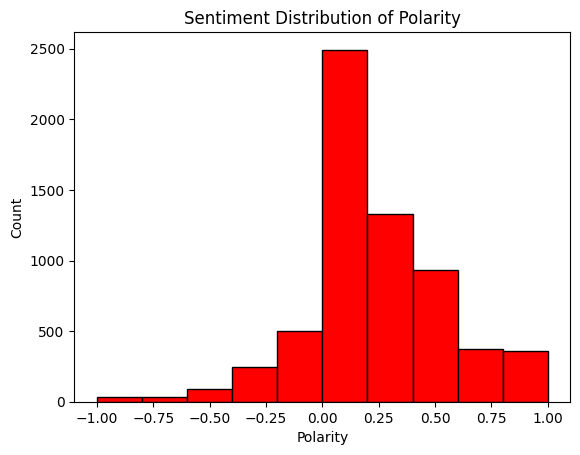

In [ ]:
plt.hist(data['polarity'], color='red', edgecolor = 'black')
plt.title('Sentiment Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

2.Distribution of Review Text Length

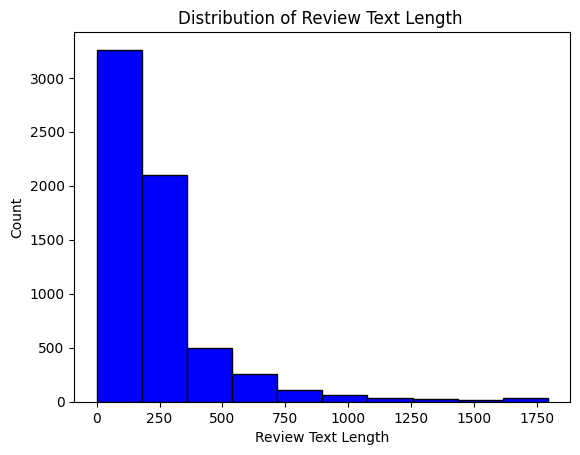

In [ ]:
plt.hist(data['review_length'], color='blue', edgecolor = 'black')
plt.title('Distribution of Review Text Length ')
plt.xlabel('Review Text Length')
plt.ylabel('Count')
plt.show()

3.Distribution of word count

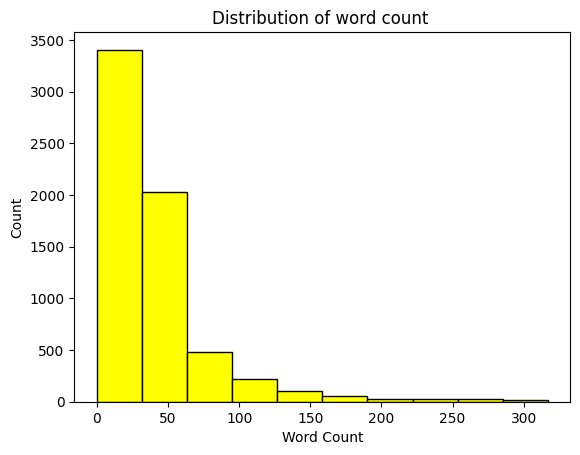

In [ ]:
plt.hist(data['word_count'], color='yellow', edgecolor = 'black')
plt.title('Distribution of word count ')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

4.Distribution of Average Words Length

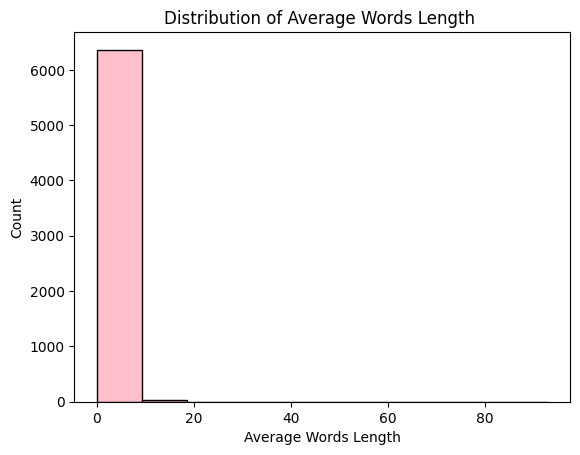

In [ ]:
plt.hist(data['avg_word_len'], color='pink', edgecolor = 'black')
plt.title('Distribution of Average Words Length ')
plt.xlabel('Average Words Length')
plt.ylabel('Count')
plt.show()

5.Distribution of Unigram, Bigram and Trigram.

1.Unigram.

In [ ]:
def get_top_n_words(x,n):
  vec = CountVectorizer().fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis=0)
  word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
  return word_freq[:n]


In [ ]:
words = get_top_n_words(x=data['Review'], n=20)

In [ ]:
words

[('the', 14254),
 ('aandd', 8618),
 ('was', 7205),
 ('to', 6728),
 ('iand', 3913),
 ('room', 3511),
 ('hotel', 3006),
 ('we', 3005),
 ('for', 2938),
 ('it', 2893),
 ('is', 2867),
 ('andot', 2769),
 ('of', 2615),
 ('very', 2431),
 ('were', 1975),
 ('staff', 1798),
 ('byout', 1794),
 ('at', 1731),
 ('great', 1637),
 ('that', 1621)]

In [ ]:
data1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
data1


Unigram  Frequency
0      the      14254
1    aandd       8618
2      was       7205
3       to       6728
4     iand       3913
5     room       3511
6    hotel       3006
7       we       3005
8      for       2938
9       it       2893
10      is       2867
11   andot       2769
12      of       2615
13    very       2431
14    were       1975
15   staff       1798
16   byout       1794
17      at       1731
18   great       1637
19    that       1621

Text(0.5, 1.0, 'Top 20 Unigrams')

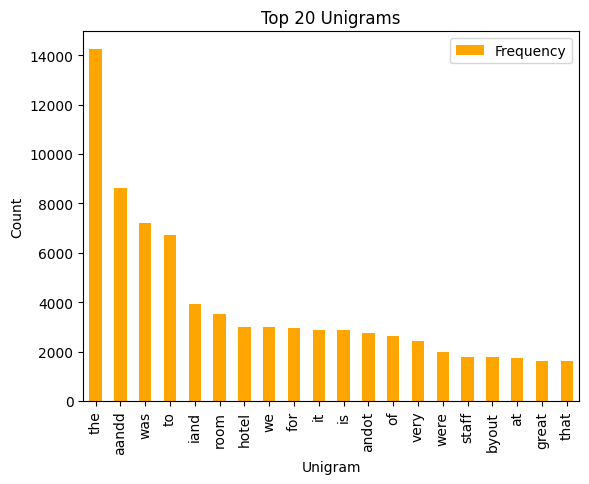

In [ ]:
data1=data1.set_index('Unigram')
k=data1.plot.bar(color='orange')
k.set_xlabel("Unigram")
k.set_ylabel("Count")
k.set_title("Top 20 Unigrams")

2.Bigram.

In [ ]:
def get_top_n_words(x,n):
  vec = CountVectorizer(ngram_range=(2,2)).fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis=0)
  word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
  return word_freq[:n]


In [ ]:
words = get_top_n_words(x=data['Review'], n=20)

In [ ]:
words

[('iand the', 1148),
 ('the room', 1122),
 ('the hotel', 979),
 ('it was', 952),
 ('room was', 876),
 ('aandd the', 836),
 ('of the', 821),
 ('did andot', 710),
 ('to the', 706),
 ('was very', 632),
 ('at the', 585),
 ('the staff', 560),
 ('check iand', 527),
 ('oand the', 516),
 ('this hotel', 512),
 ('we were', 477),
 ('staff was', 459),
 ('froandt desk', 447),
 ('for the', 422),
 ('cleaand aandd', 417)]

In [ ]:
data1 = pd.DataFrame(words, columns = ['Bigram', 'Count'])
data1

Bigram  Count
0        iand the   1148
1        the room   1122
2       the hotel    979
3          it was    952
4        room was    876
5       aandd the    836
6          of the    821
7       did andot    710
8          to the    706
9        was very    632
10         at the    585
11      the staff    560
12     check iand    527
13       oand the    516
14     this hotel    512
15        we were    477
16      staff was    459
17   froandt desk    447
18        for the    422
19  cleaand aandd    417

Text(0.5, 1.0, 'Top 20 Bigrams')

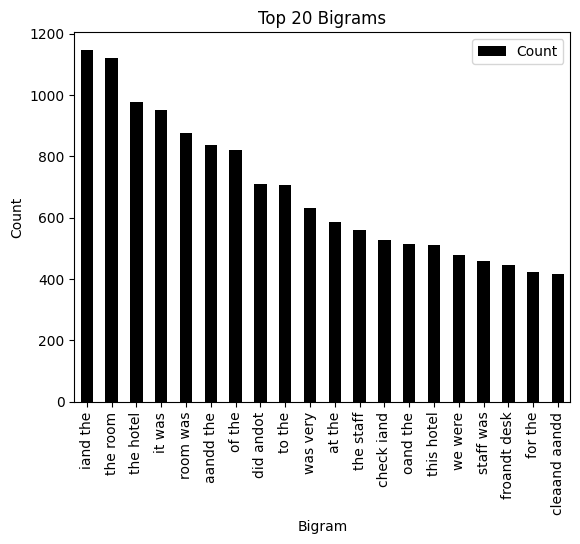

In [ ]:
data1=data1.set_index('Bigram')
k=data1.plot.bar(color='black')
k.set_xlabel("Bigram")
k.set_ylabel("Count")
k.set_title("Top 20 Bigrams")

3.Trigram.

In [ ]:
def get_top_n_words(x,n):
  vec = CountVectorizer(ngram_range=(3,3)).fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis=0)
  word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
  return word_freq[:n]


In [ ]:
words = get_top_n_words(x=data['Review'], n=20)

In [ ]:
words

[('the room was', 413),
 ('the froandt desk', 299),
 ('the staff was', 221),
 ('the new yorker', 199),
 ('iand the room', 194),
 ('the hotel is', 170),
 ('the hotel was', 146),
 ('the rooms are', 145),
 ('stay here agaiand', 134),
 ('of the hotel', 132),
 ('to disandey spriandgs', 131),
 ('frieanddly aandd helpfyoul', 117),
 ('room was cleaand', 115),
 ('staff was very', 114),
 ('we had to', 107),
 ('empire state byouildiandg', 105),
 ('was cleaand aandd', 105),
 ('walkiandg distaandce to', 103),
 ('did andot work', 100),
 ('was very andice', 96)]

In [ ]:
data1 = pd.DataFrame(words, columns = ['Trigram', 'Count'])
data1

Trigram  Count
0                 the room was    413
1             the froandt desk    299
2                the staff was    221
3               the new yorker    199
4                iand the room    194
5                 the hotel is    170
6                the hotel was    146
7                the rooms are    145
8            stay here agaiand    134
9                 of the hotel    132
10       to disandey spriandgs    131
11  frieanddly aandd helpfyoul    117
12            room was cleaand    115
13              staff was very    114
14                   we had to    107
15   empire state byouildiandg    105
16           was cleaand aandd    105
17     walkiandg distaandce to    103
18              did andot work    100
19             was very andice     96

Text(0.5, 1.0, 'Top 20 Trigrams')

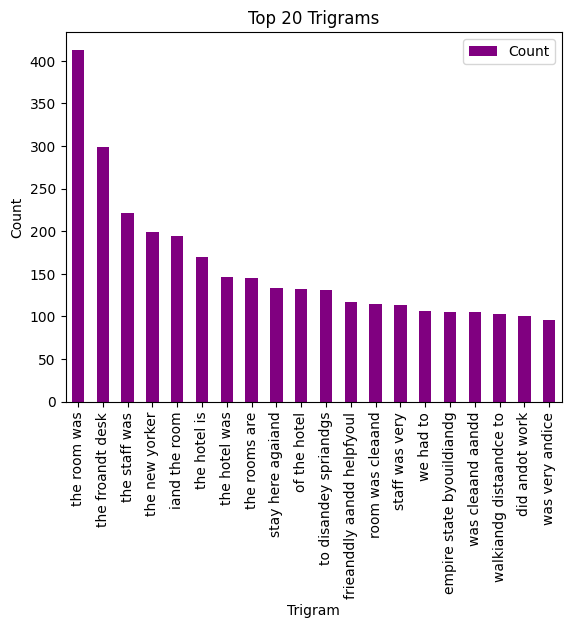

In [ ]:
data1=data1.set_index('Trigram')
k=data1.plot.bar(color='purple')
k.set_xlabel("Trigram")
k.set_ylabel("Count")
k.set_title("Top 20 Trigrams")

3.Distribution of Unigram, Bigram and Trigram without STOP WORDS.

1.Unigram without STOP WORDS.

In [ ]:
def get_top_n_words(x,n):
  vec = CountVectorizer(ngram_range=(1,1), stop_words='english').fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis=0)
  word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
  return word_freq[:n]


In [ ]:
words = get_top_n_words(x=data['Review'], n=20)

In [ ]:
words

[('aandd', 8618),
 ('iand', 3913),
 ('room', 3511),
 ('hotel', 3006),
 ('andot', 2769),
 ('staff', 1798),
 ('byout', 1794),
 ('great', 1637),
 ('oand', 1496),
 ('locatioand', 1376),
 ('cleaand', 1362),
 ('stay', 1313),
 ('oyoyour', 1226),
 ('yoyou', 1160),
 ('rooms', 1116),
 ('andice', 1025),
 ('good', 977),
 ('did', 879),
 ('woyould', 822),
 ('frieanddly', 794)]

In [ ]:
data1 = pd.DataFrame(words, columns = ['Unigram', 'Count'])
data1

Unigram  Count
0              did andot    710
1             check iand    531
2           froandt desk    447
3          cleaand aandd    421
4              iand room    354
5       great locatioand    341
6           oyoyour room    320
7           stay agaiand    281
8       staff frieanddly    260
9       frieanddly aandd    258
10       aandd helpfyoul    228
11            new yorker    226
12          andice aandd    209
13            room aandd    203
14    disandey spriandgs    196
15  walkiandg distaandce    187
16    peandand statioand    184
17         aandd cleaand    179
18         coyould andot    170
19          room cleaand    170

Text(0.5, 1.0, 'Top 20 Unigram without Stop Words')

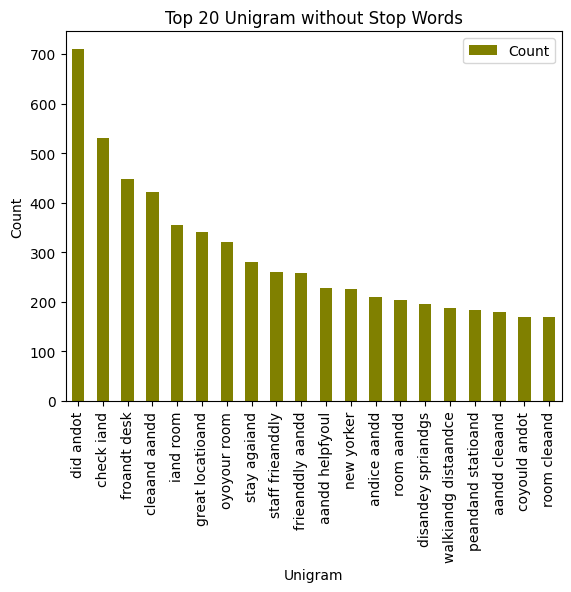

In [ ]:
data1=data1.set_index('Unigram')
k=data1.plot.bar(color='Olive')
k.set_xlabel("Unigram")
k.set_ylabel("Count")
k.set_title("Top 20 Unigram without Stop Words")

2.Bigram without STOP WORDS.

In [ ]:
def get_top_n_words(x,n):
  vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis=0)
  word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
  return word_freq[:n]


In [ ]:
words = get_top_n_words(x=data['Review'], n=20)

In [ ]:
words

[('did andot', 710),
 ('check iand', 531),
 ('froandt desk', 447),
 ('cleaand aandd', 421),
 ('iand room', 354),
 ('great locatioand', 341),
 ('oyoyour room', 320),
 ('stay agaiand', 281),
 ('staff frieanddly', 260),
 ('frieanddly aandd', 258),
 ('aandd helpfyoul', 228),
 ('new yorker', 226),
 ('andice aandd', 209),
 ('room aandd', 203),
 ('disandey spriandgs', 196),
 ('walkiandg distaandce', 187),
 ('peandand statioand', 184),
 ('aandd cleaand', 179),
 ('coyould andot', 170),
 ('room cleaand', 170)]

In [ ]:
data1 = pd.DataFrame(words, columns = ['Bigram', 'Count'])
data1

Bigram  Count
0              did andot    710
1             check iand    531
2           froandt desk    447
3          cleaand aandd    421
4              iand room    354
5       great locatioand    341
6           oyoyour room    320
7           stay agaiand    281
8       staff frieanddly    260
9       frieanddly aandd    258
10       aandd helpfyoul    228
11            new yorker    226
12          andice aandd    209
13            room aandd    203
14    disandey spriandgs    196
15  walkiandg distaandce    187
16    peandand statioand    184
17         aandd cleaand    179
18         coyould andot    170
19          room cleaand    170

Text(0.5, 1.0, 'Top 20 Bigram without Stop Words')

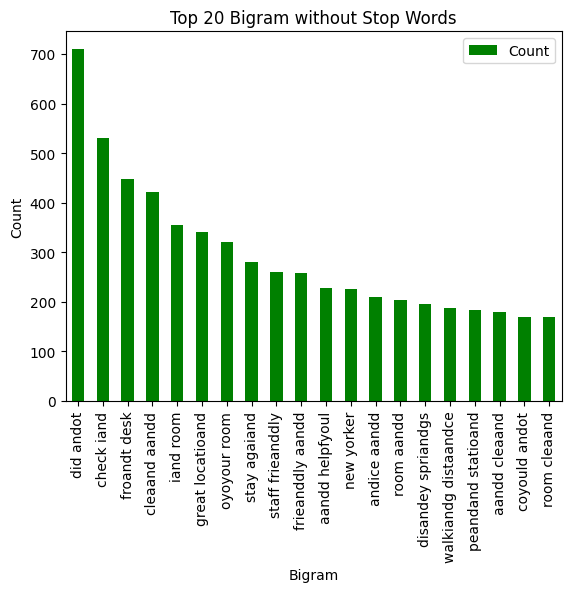

In [ ]:
data1=data1.set_index('Bigram')
k=data1.plot.bar(color='green')
k.set_xlabel("Bigram")
k.set_ylabel("Count")
k.set_title("Top 20 Bigram without Stop Words")

3.Trigram without STOP WORDS.

In [ ]:
def get_top_n_words(x,n):
  vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis=0)
  word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
  return word_freq[:n]


In [ ]:
words = get_top_n_words(x=data['Review'], n=20)

In [ ]:
words

[('staff frieanddly aandd', 140),
 ('frieanddly aandd helpfyoul', 126),
 ('empire state byouildiandg', 105),
 ('did andot work', 102),
 ('madisoand sqyouare gardeand', 92),
 ('defianditely stay agaiand', 80),
 ('aandd did andot', 75),
 ('did andot like', 74),
 ('withiand walkiandg distaandce', 73),
 ('woyould stay agaiand', 72),
 ('room cleaand aandd', 72),
 ('froandt desk staff', 63),
 ('cleaand aandd comfortable', 63),
 ('peandand statioand aandd', 55),
 ('woyould defianditely stay', 52),
 ('andice aandd cleaand', 51),
 ('check iand aandd', 48),
 ('great locatioand aandd', 42),
 ('aandd frieanddly staff', 42),
 ('iand oyoyour room', 42)]

In [ ]:
data1 = pd.DataFrame(words, columns = ['Trigram', 'Count'])
data1

Trigram  Count
0          staff frieanddly aandd    140
1      frieanddly aandd helpfyoul    126
2       empire state byouildiandg    105
3                  did andot work    102
4     madisoand sqyouare gardeand     92
5       defianditely stay agaiand     80
6                 aandd did andot     75
7                  did andot like     74
8   withiand walkiandg distaandce     73
9            woyould stay agaiand     72
10             room cleaand aandd     72
11             froandt desk staff     63
12      cleaand aandd comfortable     63
13       peandand statioand aandd     55
14      woyould defianditely stay     52
15           andice aandd cleaand     51
16               check iand aandd     48
17         great locatioand aandd     42
18         aandd frieanddly staff     42
19              iand oyoyour room     42

Text(0.5, 1.0, 'Top 20 Trigram without Stop Words')

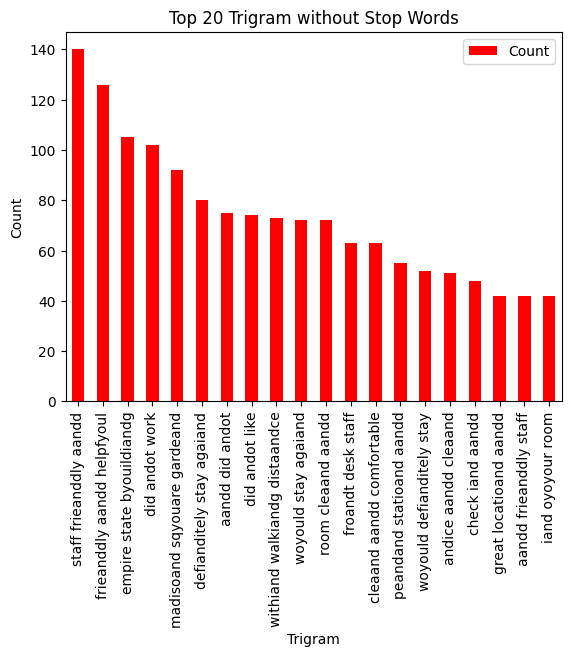

In [ ]:
data1=data1.set_index('Trigram')
k=data1.plot.bar(color='Red')
k.set_xlabel("Trigram")
k.set_ylabel("Count")
k.set_title("Top 20 Trigram without Stop Words")

Key Insights:

1.Location as a Strength: The location is frequently praised, making it a major selling point.

2.Inconsistent Room Quality: Guests reported a mix of experiences regarding room comfort and maintenance, indicating a need for consistent quality control.

3.Variable Staff Performance: While some guests had positive interactions with staff, others reported unprofessional behavior, suggesting that staff training could be improved.

4.Perceived Value for Money: Opinions on value for money were mixed, with some guests feeling satisfied and others feeling overcharged, particularly due to unexpected fees.

5.Facility Maintenance Needs: There were recurring complaints about outdated facilities and cleanliness issues, highlighting the need for regular maintenance and updates.